<a href="https://colab.research.google.com/github/Prad0510/House-Prices---Advanced-Regression-Techniques-Kaggle-/blob/main/EXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

In [ ]:
X.index.equals(y.index)

True

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.isnull().sum().sort_values(ascending=False)

,0
PoolQC,1162
MiscFeature,1122
Alley,1094
Fence,935
MasVnrType,683
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


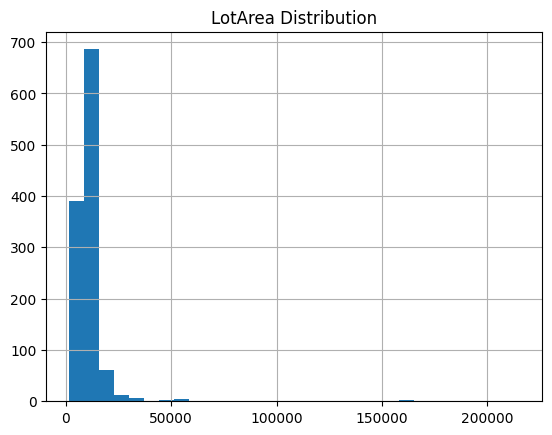

In [ ]:
import matplotlib.pyplot as plt

X_train["LotArea"].hist(bins=30)
plt.title("LotArea Distribution")
plt.show()

In [ ]:
int_features = X_train.select_dtypes(include=['int64']).columns
skewness = X_train[int_features].skew()
display(skewness.sort_values(ascending=False))

,0
MiscVal,22.053579
PoolArea,14.396098
LotArea,11.958088
3SsnPorch,9.833911
LowQualFinSF,9.199456
KitchenAbvGr,4.445055
BsmtFinSF2,4.217895
ScreenPorch,4.090393
BsmtHalfBath,4.005786
EnclosedPorch,3.163946


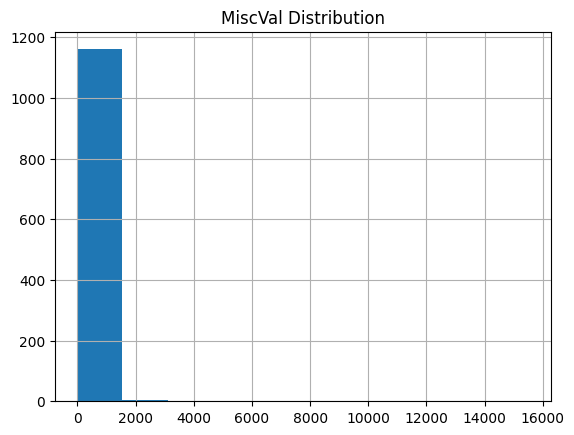

In [ ]:
X_train["MiscVal"].hist(bins=10)
plt.title("MiscVal Distribution")
plt.show()

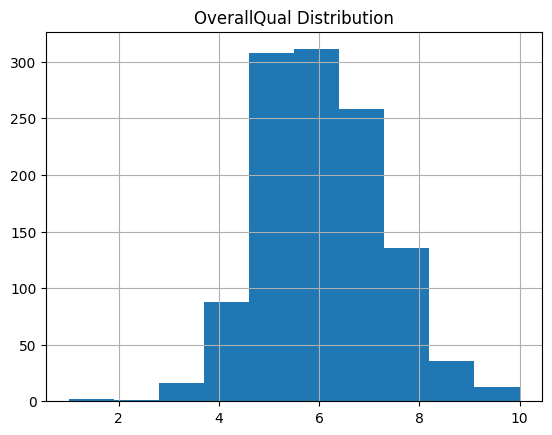

In [ ]:
X_train["OverallQual"].hist(bins=10)
plt.title("OverallQual Distribution")
plt.show()

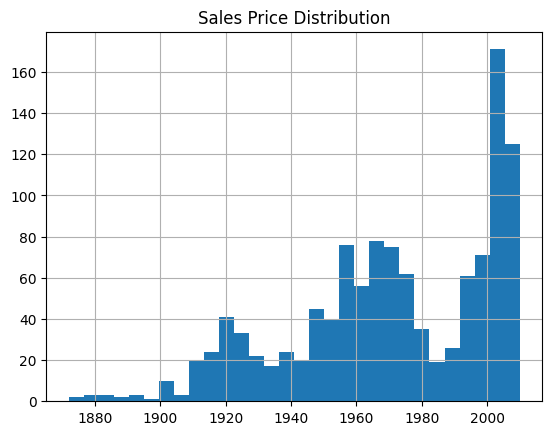

In [ ]:
X_train["YearBuilt"].hist(bins=30)
plt.title("Sales Price Distribution")
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = X_train.select_dtypes(include=['object']).columns
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])

In [ ]:
X_train.isnull().sum().sort_values(ascending=False)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [ ]:
X_test.isnull().sum().sort_values(ascending=False)

,0
PoolQC,291
MiscFeature,284
Alley,275
Fence,244
MasVnrType,189
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [ ]:
X_test[num_cols] = num_imputer.transform(X_test[num_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [ ]:
X_test.isnull().sum().sort_values(ascending=False)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output=False)

In [ ]:
X_train_cat = ohe.fit_transform(X_train[cat_cols])

In [ ]:
X_test_cat = ohe.transform(X_test[cat_cols])

In [ ]:
cat_feature_names = ohe.get_feature_names_out(cat_cols)
X_train_cat = pd.DataFrame(X_train_cat,
                           columns=cat_feature_names,
                           index=X_train.index)
X_test_cat = pd.DataFrame(X_test_cat,
                          columns=cat_feature_names,
                          index=X_test.index)

In [ ]:
X_train = X_train.drop(cat_cols, axis=1)
X_test = X_test.drop(cat_cols, axis=1)

In [ ]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,...,294.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
1066,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,...,380.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
638,639.0,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,...,0.0,328.0,0.0,164.0,0.0,0.0,0.0,0.0,5.0,2008.0
799,800.0,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,...,240.0,0.0,0.0,264.0,0.0,0.0,0.0,0.0,6.0,2007.0
380,381.0,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,...,308.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,5.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096.0,20.0,78.0,9317.0,6.0,5.0,2006.0,2006.0,0.0,24.0,...,440.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0
1130,1131.0,50.0,65.0,7804.0,4.0,3.0,1928.0,1950.0,0.0,622.0,...,576.0,431.0,44.0,0.0,0.0,0.0,0.0,0.0,12.0,2009.0
1294,1295.0,20.0,60.0,8172.0,5.0,7.0,1955.0,1990.0,0.0,167.0,...,572.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
860,861.0,50.0,55.0,7642.0,7.0,8.0,1918.0,1998.0,0.0,0.0,...,216.0,0.0,240.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0


In [ ]:
X_train = pd.concat([X_train, X_train_cat], axis=1)
X_test = pd.concat([X_test, X_test_cat], axis=1)

In [ ]:
import numpy as np
corr_matrix = X_train[num_cols].corr()

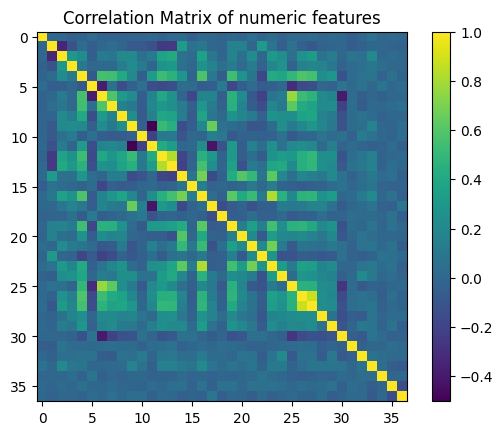

In [ ]:
plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()
plt.title("Correlation Matrix of numeric features")
plt.show()

In [ ]:
corr_threshold = 0.8
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            high_corr_pairs.append(
                (corr_matrix.columns[i], corr_matrix.columns[j],
                 corr_matrix.iloc[i, j])
            )
high_corr_pairs

[('1stFlrSF', 'TotalBsmtSF', np.float64(0.8273824411664517)),
 ('TotRmsAbvGrd', 'GrLivArea', np.float64(0.8207176091803873)),
 ('GarageArea', 'GarageCars', np.float64(0.882549508374398))]

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet( alpha=0.1,
    l1_ratio=0.5,
    random_state=42)

In [ ]:
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.894e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_elastic = elastic.predict(X_test)

In [ ]:
for name,model in{
    "Linear":linear,
    "Ridge":ridge,
    "Lasso":lasso,
    "Elastic":elastic
}.items():
    preds = model.predict(X_test)
    remse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} RMSE: {remse}")

Linear RMSE: 29477.004825231656
Ridge RMSE: 29835.652717757977
Lasso RMSE: 28237.12736237615
Elastic RMSE: 31690.869119975432


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_preds = tree.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_preds))
print(f"Decision Tree RMSE: {tree_rmse}")

Decision Tree RMSE: 41784.63229019387


In [ ]:
for depth in [3,5,7,9,12,16,None]:
    tree = DecisionTreeRegressor(max_depth=depth,
                                 min_samples_leaf=20,
                                 random_state=42)
    tree.fit(X_train, y_train)
    y_pred_dt = tree.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    print(f"Decision Tree (max_depth={depth}) RMSE: {rmse}")

Decision Tree (max_depth=3) RMSE: 43563.899942426055
Decision Tree (max_depth=5) RMSE: 40132.554857127354
Decision Tree (max_depth=7) RMSE: 39267.82313035691
Decision Tree (max_depth=9) RMSE: 38882.85078042426
Decision Tree (max_depth=12) RMSE: 38880.26497982895
Decision Tree (max_depth=16) RMSE: 38880.26497982895
Decision Tree (max_depth=None) RMSE: 38880.26497982895


In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train, tree.predict(X_train)))
test_rmse  = np.sqrt(mean_squared_error(y_test, tree.predict(X_test)))
print(f"Decision Tree (max_depth={depth}) RMSE: {rmse}")

Decision Tree (max_depth=None) RMSE: 38880.26497982895


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rf_rmse)


Random Forest RMSE: 28493.74875830324


In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 11325.007139034702
Test RMSE: 28493.74875830324


In [ ]:
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.06,
    max_depth=3,
    min_samples_leaf=20,
    subsample=0.8,
    random_state=42
)
gbr.fit(X_train, y_train_log)
y_train_pred_log = gbr.predict(X_train)
y_test_pred_log  = gbr.predict(X_test)
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred  = np.expm1(y_test_pred_log)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Gradient Boosting RMSE:", gbr_rmse)

Gradient Boosting RMSE: 27916.257539787184


In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 17837.313926117607
Test RMSE: 27916.257539787184


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_gbr)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 16549.809363806897


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_cv = cross_val_score(
    rf,
    X_train,
    y_train_log,
    cv=kf,
    scoring=rmse_scorer
)

print("RF CV RMSE:", -rf_cv.mean())


RF CV RMSE: 0.17313923387333013


In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=2,
    min_samples_leaf=30,
    subsample=0.8,
    random_state=42
)

gb_cv = cross_val_score(
    gbr,
    X_train,
    y_train_log,
    cv=kf,
    scoring=rmse_scorer
)

print("GB CV RMSE:", -gb_cv.mean())


GB CV RMSE: 0.1315414841212648


In [ ]:
test = pd.read_csv('test.csv')

# Apply numerical imputer to numerical columns in the test set
test[num_cols] = num_imputer.transform(test[num_cols])

# Apply categorical imputer to categorical columns in the test set
test[cat_cols] = cat_imputer.transform(test[cat_cols])

# One-hot encode categorical features for the test set using the fitted encoder
test_cat_encoded = ohe.transform(test[cat_cols])
test_cat_encoded = pd.DataFrame(test_cat_encoded,
                                columns=cat_feature_names,
                                index=test.index)

# Drop original categorical columns from the test set
test = test.drop(cat_cols, axis=1)

# Concatenate numerical and one-hot encoded categorical columns
test_processed = pd.concat([test, test_cat_encoded], axis=1)

# Ensure columns match X_train by reindexing, filling missing columns with 0
test_encoded = test_processed.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# Fit the GBR model with the full training data
gbr.fit(X_train, y_train_log)

# Predict log target
test_pred_log = gbr.predict(test_encoded)

# Inverse transform
test_pred = np.expm1(test_pred_log)

In [ ]:
submission = pd.DataFrame({
    'Id': test['Id'],          # make sure 'Id' column exists
    'SalePrice': test_pred
})

submission['Id'] = submission['Id'].astype(int)

print(submission.head())



     Id      SalePrice
0  1461  121402.162447
1  1462  153784.769443
2  1463  180538.677933
3  1464  180125.829604
4  1465  192094.655184


In [ ]:
submission.dtypes


,0
Id,int64
SalePrice,float64


In [ ]:
submission.to_csv('submission.csv', index=False)